<h2 align="center">Shoe sales analytics</h2>

In [5]:
import pandas as pd
from matplotlib import pyplot as plt

### Load Data

In [6]:
df = pd.read_csv("shoe_sales.csv")
df.head()

,date,brand,sold_qty
0,9/1/2023,Nike,24.0
1,9/1/2023,Adidas,14.0
2,9/2/2023,Nike,21.0
3,9/2/2023,Adidas,12.0
4,9/3/2023,Nike,18.0


In [7]:
df.shape

(60, 3)

In [8]:
df.describe()

,sold_qty
count,58.000000
mean,27.482759
std,88.519844
min,7.000000
25%,12.250000
50%,16.000000
75%,19.750000
max,689.000000


We see 12.25 in 25% percentile which means 25% of total values are less than 12.25

In [9]:
df.sold_qty[df.sold_qty<12.25].shape

(15,)

Total values = 60

25% of total values = 60*0.25 = 15

Hence you see 15 above when you use 25% percentile value (which is 12.25) to filter the data


Now let's do some min, max analysis

Minimum sales quantity is 7 whereas max is 689. There is a possibility it can be an outlier. 

We will first separate these values out as per the brand and then do some basic plotting to figure out whats going on

### (1) Nike sales analysis

In [10]:
df_nike = df[df.brand=="Nike"]
df_nike.shape

(30, 3)

In [11]:
df_nike.head()

,date,brand,sold_qty
0,9/1/2023,Nike,24.0
2,9/2/2023,Nike,21.0
4,9/3/2023,Nike,18.0
6,9/4/2023,Nike,22.0
8,9/5/2023,Nike,20.0


In [12]:
df_nike.describe()

,sold_qty
count,28.000000
mean,19.642857
std,3.117624
min,14.000000
25%,17.000000
50%,19.500000
75%,22.000000
max,25.000000


Minimum sales quantity per day is 14

Maximum is 25

#### Handle NA values

In [13]:
df_nike.isnull().sum()

date        0
brand       0
sold_qty    2
dtype: int64

In [14]:
df_nike[df_nike.sold_qty.isnull()]

,date,brand,sold_qty
32,9/17/2023,Nike,NaN
48,9/25/2023,Nike,NaN


**Now how should we fill NA values for sold_qty? Using median is one way**

In [15]:
df_nike.sold_qty.median()

np.float64(19.5)

In [16]:
val = round(df_nike.sold_qty.median())
val

20

In [17]:
df_nike.sold_qty.fillna(val, inplace=True)

C:\Users\Alamgir\AppData\Local\Temp\ipykernel_12800\3809410123.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_nike.sold_qty.fillna(val, inplace=True)
C:\Users\Alamgir\AppData\Local\Temp\ipykernel_12800\3809410123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nike.sold_qty.fillna(val, inplace=True)


In [18]:
df_nike.isnull().sum()

date        0
brand       0
sold_qty    0
dtype: int64

In [19]:
df_nike.describe()

,sold_qty
count,30.000000
mean,19.666667
std,3.009563
min,14.000000
25%,17.250000
50%,20.000000
75%,22.000000
max,25.000000


In [20]:
df_nike.sold_qty.sum()

np.float64(590.0)

#### Nike Shoe Sales Insights

1. On average we sell 20 nike shoes per day
2. The daily sales range is 14 to 25
3. In september month we sold 590 adidas shoes

### (2) Adidas sales analysis

In [21]:
df_adidas = df[df.brand=="Adidas"]
df_adidas.shape

(30, 3)

In [22]:
df_adidas.head()

,date,brand,sold_qty
1,9/1/2023,Adidas,14.0
3,9/2/2023,Adidas,12.0
5,9/3/2023,Adidas,11.0
7,9/4/2023,Adidas,13.0
9,9/5/2023,Adidas,10.0


In [23]:
df_adidas.describe()

,sold_qty
count,30.000000
mean,34.800000
std,123.602366
min,7.000000
25%,10.000000
50%,12.500000
75%,15.000000
max,689.000000


In [26]:
def plot_qty():
    plt.figure(figsize=(15, 6))
    
    dates = df_nike['date']
    
    plt.plot(dates, df_nike['sold_qty'], marker='o', label='Nike', color='blue')
    plt.plot(dates, df_adidas['sold_qty'], marker='o', label='Adidas', color='red')
    
    plt.xlabel('Date')
    plt.ylabel('Total Qty Sold')
    plt.title('Daily Sales Qty for Nike and Adidas in September 2023')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

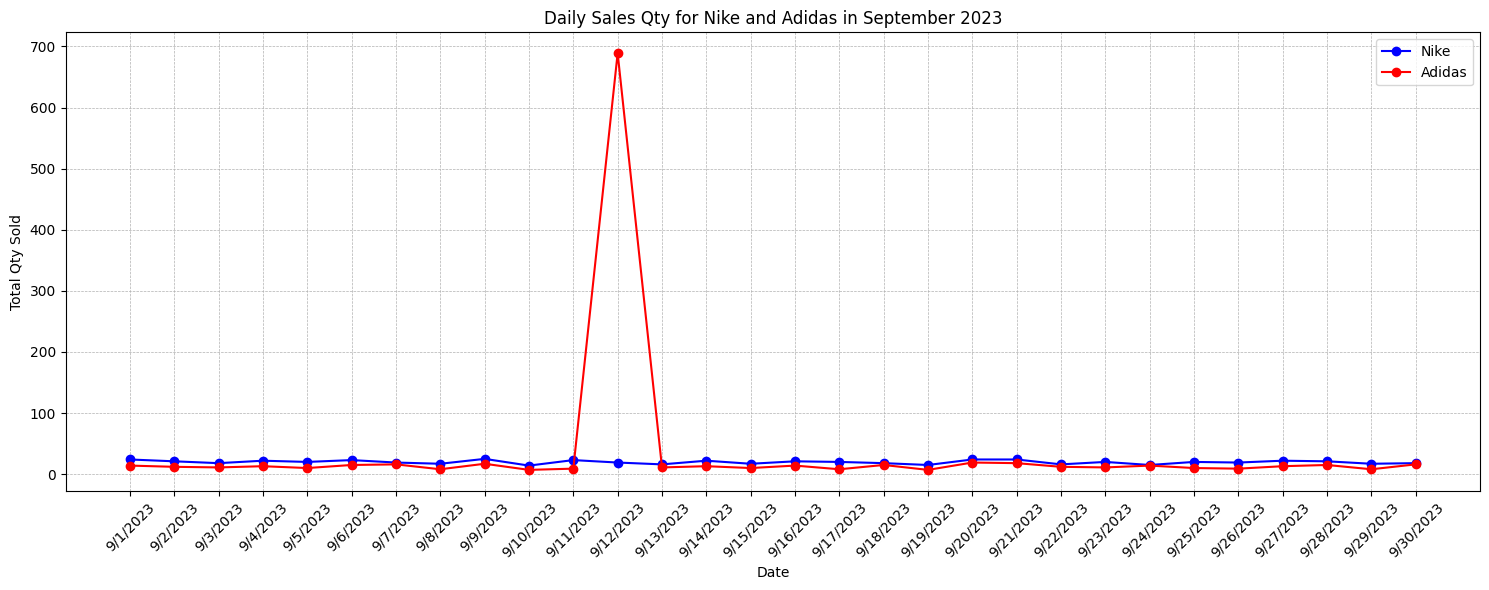

In [27]:
plot_qty()

Above plot shows an outlier for a red line (Adidas sales). We need to treat it. Since the value is very high compared to normal sales quantity, we will just replace that with a median value 

In [24]:
df_adidas["sold_qty"].describe()

count     30.000000
mean      34.800000
std      123.602366
min        7.000000
25%       10.000000
50%       12.500000
75%       15.000000
max      689.000000
Name: sold_qty, dtype: float64

75% percentile is 15.0, We will print all the values of about 75% percentile for manual examination

In [25]:
df_adidas[df.sold_qty>15]

C:\Users\dhava\AppData\Local\Temp\ipykernel_19972\917145973.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_adidas[df.sold_qty>15]


,date,brand,sold_qty
13,9/7/2023,Adidas,16.0
17,9/9/2023,Adidas,17.0
23,9/12/2023,Adidas,689.0
39,9/20/2023,Adidas,19.0
41,9/21/2023,Adidas,18.0
59,9/30/2023,Adidas,16.0


We can clearly see that the sold quantity on 9/12/2023 is an outlier. Since this is one off outlier we can manually treat it and replace it with median value. In the subsequent lectures, we will explore better ways of handling outliers such as using standard deviation

In [26]:
df_adidas["sold_qty"].replace(689, 12, inplace=True)

C:\Users\dhava\AppData\Local\Temp\ipykernel_19972\2013971404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adidas["sold_qty"].replace(689, 12, inplace=True)


In [27]:
df_adidas["sold_qty"].describe()

count    30.000000
mean     12.233333
std       3.287210
min       7.000000
25%      10.000000
50%      12.000000
75%      14.750000
max      19.000000
Name: sold_qty, dtype: float64

In [28]:
df_adidas["sold_qty"].sum()

367.0

#### Adidas Shoe Sales Insights

1. On average we sell 12 adidas shoes per day
2. The daily sales range is 7 to 19
3. In september month we sold 367 adidas shoes

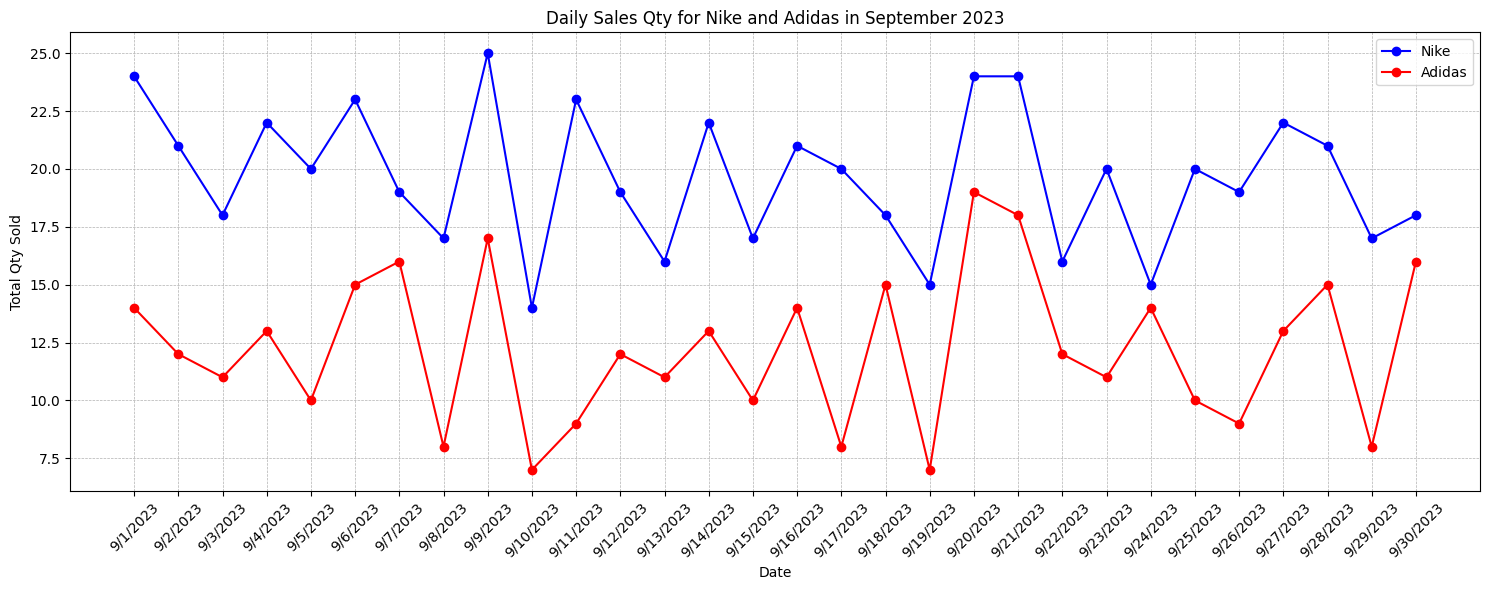

In [29]:
plot_qty()

#### Overall Insight is that Sales of Nike shoes are higher than Adidas on any given date